In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd  
import seaborn as sns

In [2]:
books = pd.read_csv("data/clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


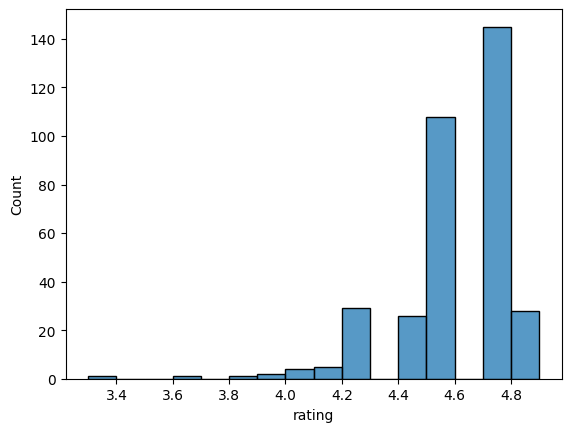

In [5]:
sns.histplot(data=books, x="rating", binwidth=.1)
plt.show()